In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('c:\\Users\\liohe\\Downloads\\bikes_rent.csv')
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


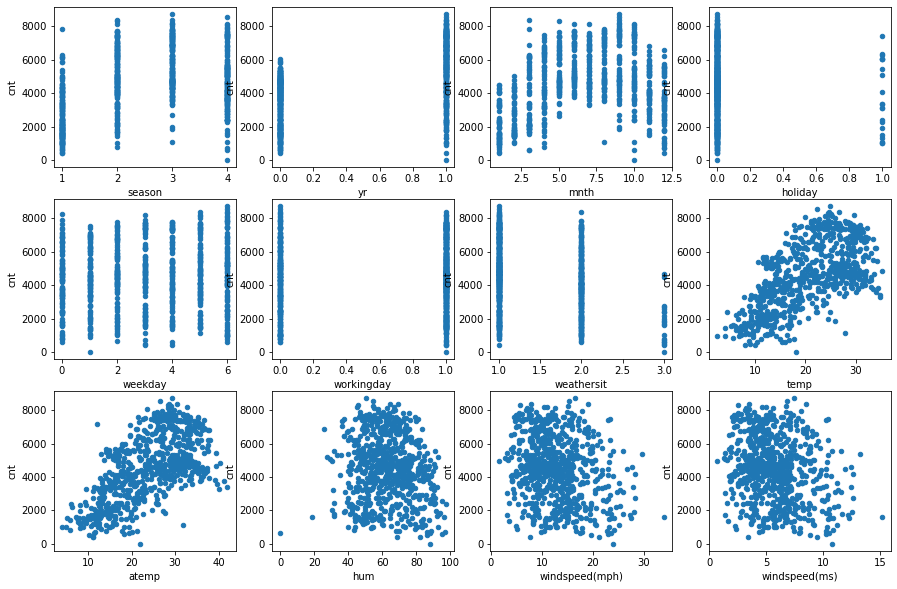

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## Блок 1
        1. Ответ: можем наблюдать нормальную зависимость с параметром мю = 6,5.
        2. Ответ: temp, atemp.

In [95]:
# Код 1.1 (0.5 балла)
# Посчитаем корреляции всех признаков, кроме последнего, с последним с помощью метода corrwith.
print(df.iloc[:,0:12].corr())
df.corrwith(df['cnt'])

                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
windspeed(ms)  -0.229046 -0.011817 -0.20

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64

In [94]:
# Код 1.2 (0.5 балла)
# Посчитаем попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt.
df.iloc[:,7:13].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [82]:
# Код 1.3 (0.5 балла)
# Выведем средние признаков.
np.mean(df)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [83]:
# Стандартизация признаков с помощью метода scale.

from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [84]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [91]:
# Обучим линейную регрессию на наших данных и посмотрим на веса признаков.

from sklearn.linear_model import LinearRegression
# Код 2.1 (1 балл)
# Создадим объект линейного регрессора, обучим его на всех данных и выведем веса модели.
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_

array([ 5.70870574e+02,  1.02195918e+03, -1.41305025e+02, -8.67574472e+01,
        1.37226626e+02,  5.63910062e+01, -3.30231036e+02,  3.67492024e+02,
        5.85536912e+02, -1.45609126e+02,  1.24579344e+13, -1.24579344e+13])

In [96]:
from sklearn.linear_model import Lasso, Ridge

In [97]:
# Код 2.2 (0.5 балла)
# Обучим линейную модель с L1-регуляризацией и выведим веса

lasso_reg = Lasso()
lasso_reg.fit(X,y)
lasso_reg.coef_

array([ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02, -8.61527813e+01,
        1.37347894e+02,  5.52123706e+01, -3.32369857e+02,  3.76363236e+02,
        5.76530794e+02, -1.44129155e+02, -1.97139689e+02, -2.80410480e-08])

In [98]:
# Код 2.3 (0.5 балла)
# Обучите линейную модель с L2-регуляризацией и выведите веса

ridge_reg = Ridge()
ridge_reg.fit(X,y)
ridge_reg.coef_

array([ 563.06457225, 1018.94837879, -131.87332028,  -86.746098  ,
        138.00511118,   55.90311038, -332.3497885 ,  386.45788919,
        566.34704706, -145.0713273 ,  -99.25944108,  -99.25944115])

In [104]:
# Код 3.1 (1 балл)
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

# Для каждого значения коэффициента из alphas обучим регрессоры Lasso и Ridge
# и запишем веса в соответствующую строку матрицы coefs_lasso/coefs_ridge.

for i, a in enumerate(alphas):
    
    lasso_reg = Lasso(alpha = a)
    lasso_reg.fit(X, y)

    w = lasso_reg.coef_
    
    for j, w in enumerate(w):
        coefs_lasso[i,j] = w
print(coefs_lasso)
print('*********************************************************************************')

for i, a in enumerate(alphas):
    
    ridge_reg = Ridge(alpha = a)
    ridge_reg.fit(X, y)

    w = ridge_reg.coef_
    
    for j, w in enumerate(w):
        coefs_ridge[i,j] = w
print(coefs_ridge)

[[ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
   1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
   5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80410480e-08]
 [ 4.10969632e+02  9.77019409e+02 -0.00000000e+00 -5.34489688e+01
   9.19434374e+01  1.75372118e+01 -3.18125568e+02  3.22829934e+02
   6.10031512e+02 -9.10689615e+01 -1.45066095e+02 -2.29811967e-08]
 [ 3.70077089e+02  9.35945490e+02  0.00000000e+00 -1.21619360e+01
   4.88886342e+01  0.00000000e+00 -3.08805664e+02  2.69417263e+02
   6.32502623e+02 -2.75042876e+01 -9.37749037e+01 -2.41605588e-08]
 [ 3.32835717e+02  8.91870058e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.79616688e+02  2.11052030e+02
   6.62920880e+02 -0.00000000e+00 -5.01551472e+01 -2.62751850e-08]
 [ 2.98134448e+02  8.45652857e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.35571345e+02  1.24144807e+02
   7.25379483e+02 -0.00000000e+00 -1.26461769e+01 -2.78779660e-08]
 [ 2.

Text(0.5, 1.0, 'Ridge')

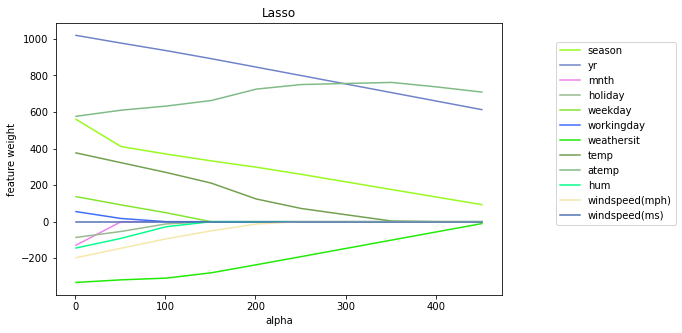

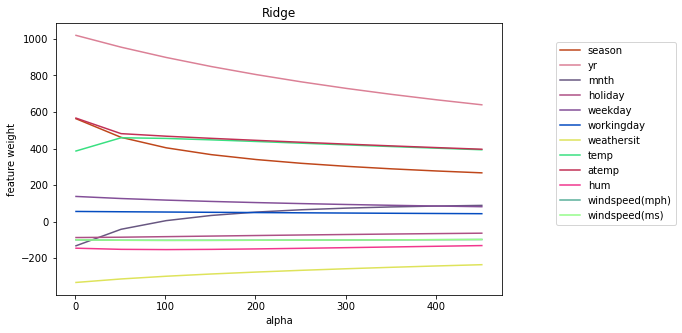

In [100]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

## Блок 2
        1. Ridge
        2. Весы перед неинформативными признаками занулятся, потому что эти признаки оказались избыточными. 
        3. Можно так считать в случае с Lasso и Ridge, тк везде коэффициенты <1е-3
        4. Lasso

In [105]:
from sklearn.linear_model import LassoCV

In [121]:
# Код 3.2 (1 балл)
# Обучим регрессор LassoCV на всех параметрах регуляризации из alpha

alphas = np.arange(1, 100, 5)

lassocv_reg = LassoCV(alphas = alphas)
lassocv_reg.fit(X, y)

LassoCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]))

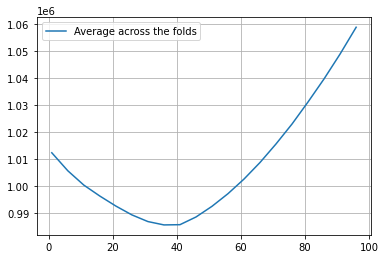

In [109]:
# Построим график _усредненного_ по строкам MSE в зависимости от alpha. 

plt.plot(lassocv_reg.alphas_, lassocv_reg.mse_path_.mean(axis=1), label='Average across the folds')
plt.grid(True)
plt.legend(loc='upper left')

In [116]:
# Выведем выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов.

print('alpha =', lassocv_reg.alpha_)

Lreg = Lasso(alpha = lassocv_reg.alpha_)
Lreg.fit(X, y)

weights = Lreg.coef_

print('\nFeature:  Weight:')
      
for feature, coeff in zip(df.columns,weights.T):
    print(feature, coeff)

lassocv_reg.mse_path_

alpha = 36

Feature:  Weight:
season 423.29084303507136
yr 989.3647596541272
mnth -0.0
holiday -64.2649975973168
weekday 104.82494838048362
workingday 29.11373699192681
weathersit -321.45757771768064
temp 338.0992158932658
atemp 603.6676626185717
hum -109.87822056063199
windspeed(mph) -160.29563707894715
windspeed(ms) -2.2744623595076613e-08


array([[ 367188.61792352,  994564.61226764,  750818.07447474,
        1434223.97281875, 1746794.34292766],
       [ 364050.26644653,  999143.98341345,  741533.64134337,
        1421500.46125002, 1717959.49515421],
       [ 362399.46968719, 1004050.09309937,  732408.12121196,
        1409361.84368368, 1689955.18519236],
       [ 362199.55020706, 1009226.64409427,  723464.77544006,
        1397828.27668232, 1662745.581585  ],
       [ 363299.62273522, 1014703.72830267,  713363.54154627,
        1386911.48367942, 1636336.89509823],
       [ 365874.51996163, 1020459.69089005,  702281.06685169,
        1376610.31743081, 1612461.84576568],
       [ 369922.35308846, 1026504.58181112,  691461.42776339,
        1366924.27912609, 1588510.84713242],
       [ 375443.11282884, 1032810.52711177,  680904.27127505,
        1357852.93187937, 1565615.41141569],
       [ 382436.79975638, 1039373.73327272,  670609.47509505,
        1349395.89004446, 1543750.01974982],
       [ 390903.41439589, 1046194.123

alphas_of_mins = [81 96 41  1  1]


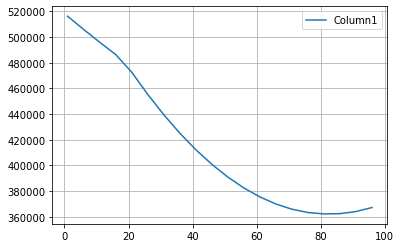

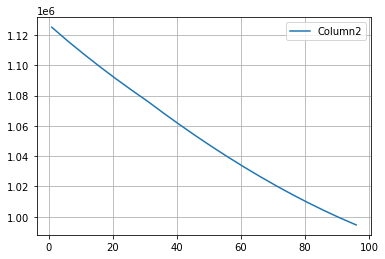

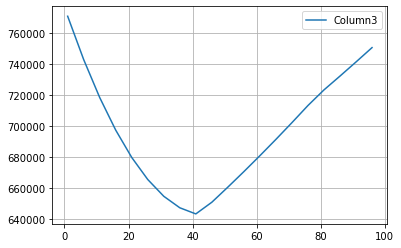

In [118]:
# Код 3.3 (1 балл)
# Выведем значения alpha, соответствующие минимумам MSE на каждом разбиении (то есть по столбцам).

index_of_mins = lassocv_reg.mse_path_.argmin(axis=0)

print("alphas_of_mins =", lassocv_reg.alphas_[index_of_mins])

# На трех отдельных графиках визуализируем столбцы .mse_path_

for i in range(3):
    plt.plot(lassocv_reg.alphas_, lassocv_reg.mse_path_[:,i], label='Column'+ str(i+1))
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

## Блок 3
        1. Ответ: season, yr, temp, atemp. Линейная зависимость видна в случае temp, atemp. В случае temp и atemp логично утверждать, что чем больше значение этих признаков, тембольше людей больше людей арендуют.
        2. Ответ: weathersit, windspeed(mph), hum. Убывающая линейная зависимость видна только в случае weathersit. Логично утверждать, что чем больше величина этих признаков, тем меньше будет спрос.
        3. Ответ: mnth -0.0. Неверно, погодные условия, соответсвующие определенным месяцам, влияют на спрос велосипедов.